# Introduction to the Low-salt-rejection Reverse Osmosis (LSRRO) Flowsheet
This tutorial shows how to build, initialize, simulate, and optimize an LSRRO flowsheet using WaterTAP.

![alt text](../docs/_static/flowsheets/lsrro.png)

## High-level Preview: Run an LSRRO optimization case.
#### 3-stage system
#### 70 g/L TDS feed, 50% Recovery


In [ ]:
import logging

from IPython.display import clear_output
from pyomo.environ import value, units as pyunits
from watertap.flowsheets.lsrro.lsrro import (
    ACase,
    BCase,
    ABTradeoff,
    run_lsrro_case,
)

logging.getLogger("idaes").setLevel(logging.ERROR)
logging.getLogger("pyomo").setLevel(logging.ERROR)

In [ ]:
# # %%capture
# m, results = run_lsrro_case(
#     number_of_stages=3,
#     water_recovery=0.50,
#     Cin=70,  # inlet NaCl conc kg/m3,
#     Qin=1e-3,  # inlet feed flowrate m3/s
#     A_case=ACase.optimize,
#     B_case=BCase.optimize,
#     B_max=3.5e-6,
#     AB_tradeoff=ABTradeoff.equality_constraint,
#     AB_gamma_factor=1,
#     has_NaCl_solubility_limit=True,
#     has_calculated_concentration_polarization=True,
#     has_calculated_ro_pressure_drop=True,
#     permeate_quality_limit=1000e-6,
#     number_of_RO_finite_elements=10,
#     # skip_initialization=True,
# )

# number_of_stages = 2
# m, results = run_lsrro_case(
#     number_of_stages, # number of RO stages
#     water_recovery=0.7, # volumetric water recovery ratio
#     Cin=70, # inlet salinity in g/L
#     Qin=None, # inlet flowrate in m3/s
#     Cbrine=None, # fix brine salinity in g/L
#     A_case=ACase.optimize, # options for water permeability: fixed, optimize
#     B_case=BCase.optimize, # options for salt permeability: single_optimium, optimize
#     AB_tradeoff=ABTradeoff.equality_constraint, # options for A-B relationship: none, equality_constraint
#     A_value=None, # fix water permeability coefficient
#     has_NaCl_solubility_limit=None, # enforce NaCl solubility limit
#     has_calculated_concentration_polarization=None, # calculate concentration polarization
#     has_calculated_ro_pressure_drop=None, # calculate RO pressure drop across each stage
#     permeate_quality_limit=None, # define the permeate salinity mass fraction
#     AB_gamma_factor=None, # define the A-B relationship factor
#     B_max=None, # define the maximum salt permeability
#     number_of_RO_finite_elements=10, # number of finite elements for each RO unit
#     set_default_bounds_on_module_dimensions=True # set default bounds on membrane length and width
#     )

Feed Concentration = 70.0 g/L
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-04 03:23:42 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-04 03:23:42 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-04 03:23:42 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:23:42 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:23:42 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-04 03:23:43 [INFO] idaes.init.fs.ROUnits[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:23:43 [INFO] idaes.init.fs.product: Initialization Complete

--------state---------


AttributeError: 'tuple' object has no attribute 'fs'

## Overview of setting up and optimizing the LSRRO flowsheet--step by step.
* Step 0: Import Python libraries.
* Step 1: Build the LSRRO flowsheet.
* Step 2: Set specifications for LSRRO flowsheet.
* Step 3: Initialize the LSRRO flowsheet.
* Step 4: Optimize the LSRRO flowsheet.
* Step 5: Visualize results.

## Step 0: Import libraries.

In [27]:
# Import LSRRO flowsheet module
from watertap.flowsheets.lsrro import lsrro

## Step 1: Build the LSRRO flowsheet.

In [79]:
# Create a Pyomo concrete model, flowsheet, and NaCl property parameter block.
m = lsrro.build(
    number_of_stages=5,
    has_NaCl_solubility_limit=True,
    has_calculated_concentration_polarization=True,
    has_calculated_ro_pressure_drop=True,
    number_of_RO_finite_elements=10,
    B_max=None,
)

## Step 2: Set specifications for the LSRRO flowsheet.

In [80]:
Cin = 100 * pyunits.gram / pyunits.liter
Qin = 1 * pyunits.Mgallons / pyunits.day
Qin = value(pyunits.convert(Qin, to_units=pyunits.m**3 / pyunits.s))
lsrro.set_operating_conditions(m, Cin=Cin, Qin=Qin)

Feed Concentration = 100.0 g/L


## Step 3: Initialize the LSRRO flowsheet model.

In [81]:
lsrro.initialize(m, verbose=False)

--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
INFO: Starting tear convergence procedure
INFO: Starting Direct tear convergence
INFO: Running Direct iteration 1
INFO: Running Direct iteration 2
INFO: Running Direct iteration 3
INFO: Running Direct iteration 4
INFO: Running Direct iteration 5
INFO: Finished Sequential Decomposition in 48.67 seconds


## Step 4: Simulate the LSRRO flowsheet.

In [84]:
results = lsrro.solve(m)
print(f"termination {results.solver.termination_condition}")

termination optimal


In [85]:
lsrro.display_state(m)
lsrro.display_system(m)

--------state---------
Feed                : 46.701 kg/s, 93815 ppm, 1.0 bar
Primary Pump 1 out  : 46.701 kg/s, 93815 ppm, 75.0 bar
Mixer 1 recycle     : 15.966 kg/s, 30446 ppm, 75.0 bar
Mixer 1 out         : 62.667 kg/s, 77670 ppm, 75.0 bar
RO 1 permeate       : 3.218 kg/s, 3848 ppm, 1.0 bar
RO 1 retentate      : 59.449 kg/s, 81666 ppm, 65.1 bar
Primary Pump 2 out  : 59.449 kg/s, 81666 ppm, 75.0 bar
Mixer 2 recycle     : 9.840 kg/s, 34074 ppm, 75.0 bar
Mixer 2 out         : 69.289 kg/s, 74908 ppm, 75.0 bar
RO 2 permeate       : 15.966 kg/s, 30446 ppm, 1.0 bar
RO 2 retentate      : 53.323 kg/s, 88221 ppm, 70.1 bar
Booster Pump 2 out  : 15.966 kg/s, 30446 ppm, 75.0 bar
Primary Pump 3 out  : 53.323 kg/s, 88221 ppm, 75.0 bar
Mixer 3 recycle     : 6.923 kg/s, 36959 ppm, 75.0 bar
Mixer 3 out         : 60.246 kg/s, 82330 ppm, 75.0 bar
RO 3 permeate       : 9.840 kg/s, 34074 ppm, 1.0 bar
RO 3 retentate      : 50.406 kg/s, 91750 ppm, 72.1 bar
Booster Pump 3 out  : 9.840 kg/s, 34074 ppm, 75.0 b

## Step 5: Optimize the LSRRO flowsheet.

In [86]:
lsrro.optimize_set_up(
    m,
    water_recovery=0.5,
    Cbrine=None,
    A_case=ACase.optimize,
    B_case=BCase.optimize,
    AB_tradeoff=ABTradeoff.inequality_constraint,
    permeate_quality_limit=500e-6,
    A_value=None,
    AB_gamma_factor=None,
    B_max=None,
    set_default_bounds_on_module_dimensions=True,
)
optimization_results = lsrro.solve(m, raise_on_failure=True)

In [88]:

lsrro.display_system(m)

----system metrics----
Feed: 46.70 kg/s, 93815 ppm
Product: 21.805 kg/s, 500 ppm
Brine: 24.896 kg/s, 175545 ppm
Volumetric water recovery: 50.0%
Number of Stages: 5
Total Membrane Area: 30979.90
Energy Consumption: 21.6 kWh/m3
Levelized cost of water: 4.93 $/m3
Primary Pump Capital Cost ($/m3):1.16
Booster Pump Capital Cost ($/m3): 0.66
ERD Capital Cost ($/m3):0.07
Membrane Capital Cost ($/m3): 0.47
Indirect Capital Cost ($/m3): 1.18
Electricity cost ($/m3): 1.51




## 

## Step 6: Visualize results

In [ ]:
from watertap.flowsheets.lsrro.multi_sweep import (
    _lsrro_presweep as setup_sensitivity_sweep,
)
from parameter_sweep import LinearSample, parameter_sweep

number_of_stages = 3
output_filename = f"param_sweep_output/{number_of_stages}_stage/results_LSRRO-x.csv"
sweep_params = {}
outputs = {}
nx = 3

# m = setup_sensitivity_sweep(number_of_stages=number_of_stages)
m.fs.feed.flow_mass_phase_comp.unfix()
m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"].fix()
m.fs.feed.properties[0].flow_vol_phase["Liq"].fix()
# Sweep parameters ------------------------------------------------------------------------

sweep_params["Feed Concentration"] = LinearSample(
    m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"], 70, 150, nx
)

sweep_params["Volumetric Recovery Rate"] = LinearSample(
    m.fs.water_recovery, 0.2, 0.65, nx
)

# Outputs  -------------------------------------------------------------------------------
outputs["LCOW"] = m.fs.costing.LCOW
outputs["LCOW wrt Feed Flow"] = m.fs.costing.LCOW_feed
outputs["SEC"] = m.fs.costing.specific_energy_consumption
outputs["SEC wrt Feed"] = m.fs.costing.specific_energy_consumption_feed

sweep_sensitivity_results = parameter_sweep(
    m,
    sweep_params,
    outputs,
    csv_results_file_name=output_filename,
    optimize_function=lsrro.solve,
    interpolate_nan_outputs=True,
)

In [14]:
import pandas as pd

results = pd.read_csv(output_filename)
results

,# Feed Concentration,Volumetric Recovery Rate,LCOW,LCOW wrt Feed Flow,SEC,SEC wrt Feed
0,70.0,0.200,2.873031,0.574606,11.999270,2.399854
1,70.0,0.425,2.143961,0.911183,9.014503,3.831164
2,70.0,0.650,2.742718,1.782766,12.482860,8.113856
3,110.0,0.200,7.675200,1.535040,29.628800,5.925760
4,110.0,0.425,5.907735,2.510787,25.262740,10.736670
5,110.0,0.650,NaN,NaN,NaN,NaN
6,150.0,0.200,NaN,NaN,NaN,NaN
7,150.0,0.425,NaN,NaN,NaN,NaN
8,150.0,0.650,NaN,NaN,NaN,NaN


# 20 Stages LSRRO?!

In [ ]:
from watertap.flowsheets.lsrro.multi_sweep import (
    _lsrro_presweep as setup_sensitivity_sweep,
)
from parameter_sweep import LinearSample, parameter_sweep
import pandas as pd

number_of_stages = 5
dfs = []
for n in [3, 5, 6, 7, 20]:
    output_filename = f"param_sweep_output/{n}_stage/results_LSRRO-2.csv"
    sweep_params = {}
    outputs = {}
    nx = 10

    m = setup_sensitivity_sweep(number_of_stages=n)
    m.fs.feed.flow_mass_phase_comp.unfix()
    m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"].fix()
    m.fs.feed.properties[0].flow_vol_phase["Liq"].fix()
    # Sweep parameters ------------------------------------------------------------------------

    sweep_params["Feed Concentration"] = LinearSample(
        m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"], 70, 225, nx
    )

    sweep_params["Volumetric Recovery Rate"] = LinearSample(
        m.fs.water_recovery, 0.2, 0.65, nx
    )

    # Outputs  -------------------------------------------------------------------------------
    outputs["LCOW"] = m.fs.costing.LCOW
    outputs["LCOW wrt Feed Flow"] = m.fs.costing.LCOW_feed
    outputs["SEC"] = m.fs.costing.specific_energy_consumption
    outputs["SEC wrt Feed"] = m.fs.costing.specific_energy_consumption_feed

    sweep_sensitivity_results = parameter_sweep(
        m,
        sweep_params,
        outputs,
        csv_results_file_name=output_filename,
        optimize_function=lsrro.solve,
        interpolate_nan_outputs=True,
    )
    df = pd.read_csv(output_filename)
    df["number_stages"] = n
    dfs.append(df)
df.to_csv("all_stages_results-2.csv", index=False)

Feed Concentration = 70.0 g/L
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-04 03:31:04 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-04 03:31:04 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-04 03:31:04 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:31:04 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:31:04 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-04 03:31:05 [INFO] idaes.init.fs.ROUnits[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-04 03:31:05 [INFO] idaes.init.fs.EnergyRecoveryDevices[1].control

In [47]:
import matplotlib.pyplot as plt
import numpy as np


def plot_lsrro_sensitivity(results, zcol="LCOW", cmap="viridis"):
    fig, ax = plt.subplots(figsize=(4, 4))

    X, Y = np.meshgrid(
        np.unique(results["# Feed Concentration"].to_numpy()),
        np.unique(results["Volumetric Recovery Rate"].to_numpy()),
    )

    Z = results[zcol].to_numpy().reshape(X.shape)

    cbar = ax.contourf(X, Y, Z, cmap=cmap)

    ax.set_xlabel("Feed Concentration (g/L)")
    ax.set_ylabel("Volumetric Recovery Rate (%)")

    cbar = fig.colorbar(cbar, ax=ax)
    cbar.set_label(zcol)
    return fig, ax, cbar

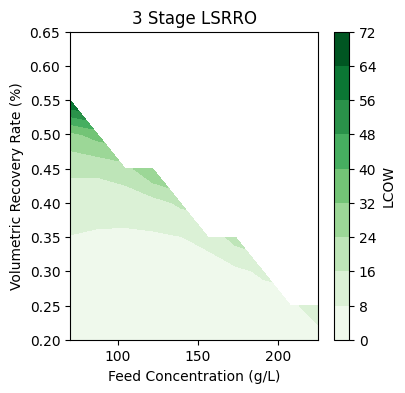

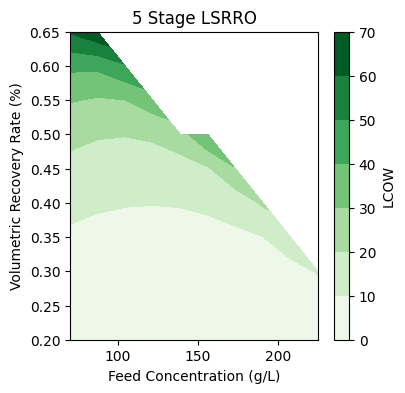

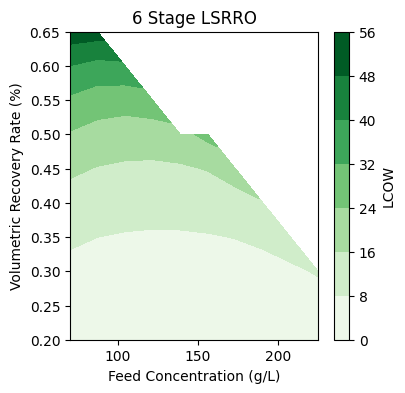

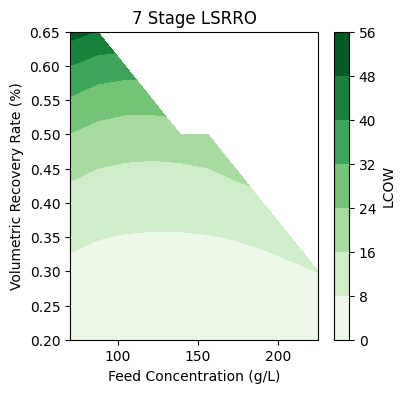

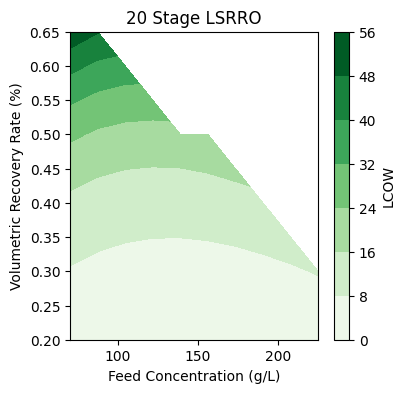

In [48]:
data = pd.DataFrame()

results_3_stage = pd.read_csv("param_sweep_output/3_stage/results_LSRRO.csv")
results_3_stage["number_stages"] = 3
fig, ax, cbar = plot_lsrro_sensitivity(results_3_stage, cmap="Greens")
ax.set_title("3 Stage LSRRO")
data = pd.concat([data, results_3_stage])

results_5_stage = pd.read_csv("param_sweep_output/5_stage/results_LSRRO.csv")
results_5_stage["number_stages"] = 5
fig, ax, cbar = plot_lsrro_sensitivity(results_5_stage, cmap="Greens")
ax.set_title("5 Stage LSRRO")
data = pd.concat([data, results_5_stage])

results_6_stage = pd.read_csv("param_sweep_output/6_stage/results_LSRRO.csv")
results_6_stage["number_stages"] = 6
fig, ax, cbar = plot_lsrro_sensitivity(results_6_stage, cmap="Greens")
ax.set_title("6 Stage LSRRO")
data = pd.concat([data, results_6_stage])

results_7_stage = pd.read_csv("param_sweep_output/7_stage/results_LSRRO.csv")
results_7_stage["number_stages"] = 7
fig, ax, cbar = plot_lsrro_sensitivity(results_7_stage, cmap="Greens")
ax.set_title("7 Stage LSRRO")
data = pd.concat([data, results_7_stage])

results_20_stage = pd.read_csv("param_sweep_output/20_stage/results_LSRRO.csv")
results_20_stage["number_stages"] = 20
fig, ax, cbar = plot_lsrro_sensitivity(results_20_stage, cmap="Greens")
ax.set_title("20 Stage LSRRO")
data = pd.concat([data, results_20_stage])

data.dropna(inplace=True)
data.to_csv("all_stages_results.csv", index=False)

Text(0.5, 1.0, '20 Stage LSRRO')

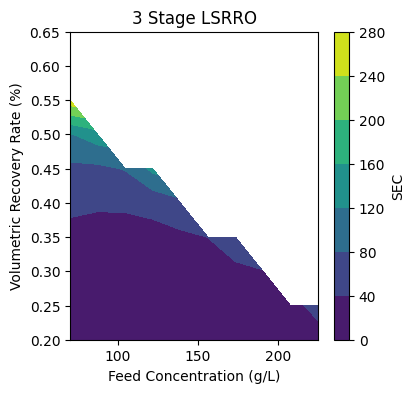

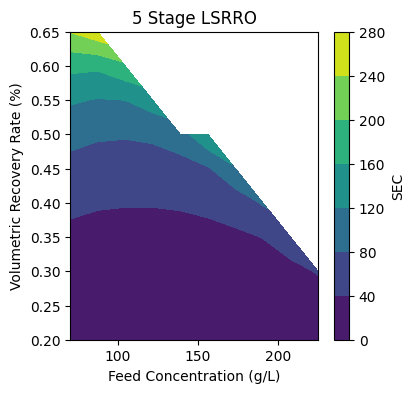

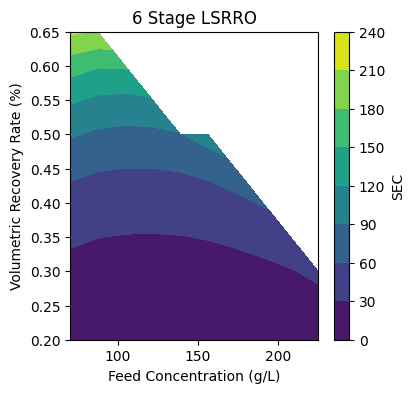

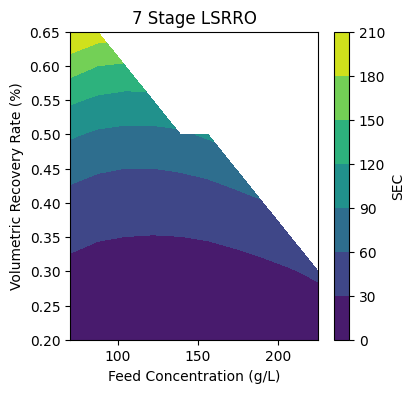

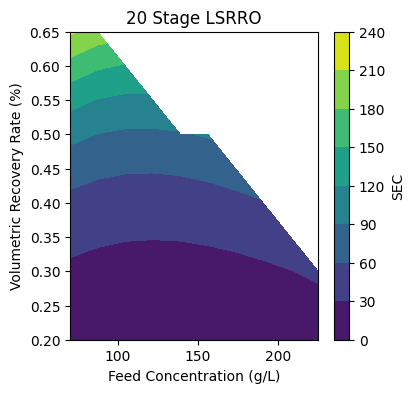

In [49]:
fig, ax, cbar = plot_lsrro_sensitivity(results_3_stage, zcol="SEC")
ax.set_title("3 Stage LSRRO")

fig, ax, cbar = plot_lsrro_sensitivity(results_5_stage, zcol="SEC")
ax.set_title("5 Stage LSRRO")

fig, ax, cbar = plot_lsrro_sensitivity(results_6_stage, zcol="SEC")
ax.set_title("6 Stage LSRRO")

fig, ax, cbar = plot_lsrro_sensitivity(results_7_stage, zcol="SEC")
ax.set_title("7 Stage LSRRO")

fig, ax, cbar = plot_lsrro_sensitivity(results_20_stage, zcol="SEC")
ax.set_title("20 Stage LSRRO")


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  linear
Regularization done:  True
0    |     1e-05    |     0.6032928954009091    |     7027.549047371831    |     1.5604293518149583e-12    |     7029.692847663621    |     1.560905371103787e-12
0    |     2e-05    |     0.6032856068118975    |     7027.549047371831    |     1.5604293518149583e-12    |     7031.837956129223    |     1.561381680865553e-12
0    |     5e-05    |     0.6032637334854535    |     7027.549047371831    |     1.5604293518149583e-12    |     7038.281142553963    |     1.5628123556496927e-12
0    |     7.5e-05    |     0.6032454970435538    |     7027.549047371831    |     1.5604293518149583e-12    |     7043.659489895722    |     1.5640065886603431e-12
0    |     0.0001    |     0.6032272527109662    |     7027.549047371831    |     1.5604293518149583e-12    |     7049.046062150767    |     1.5652026479686148e-12
0    |     0.0002    |     0.6031541963038002 

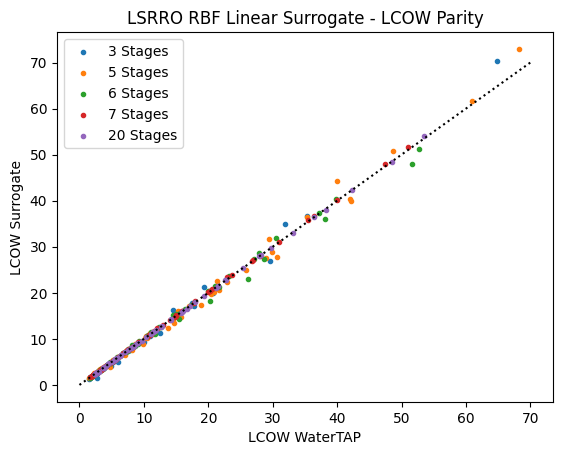

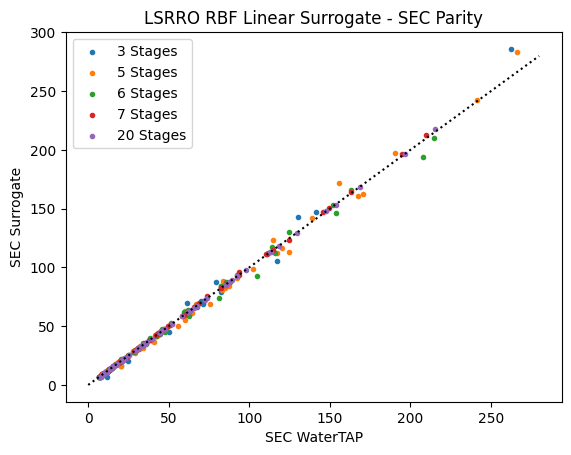

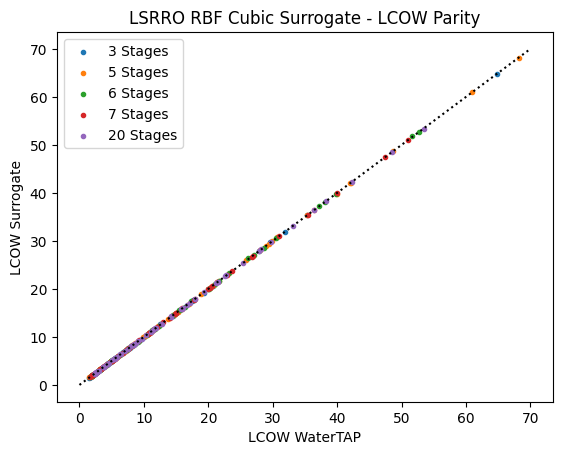

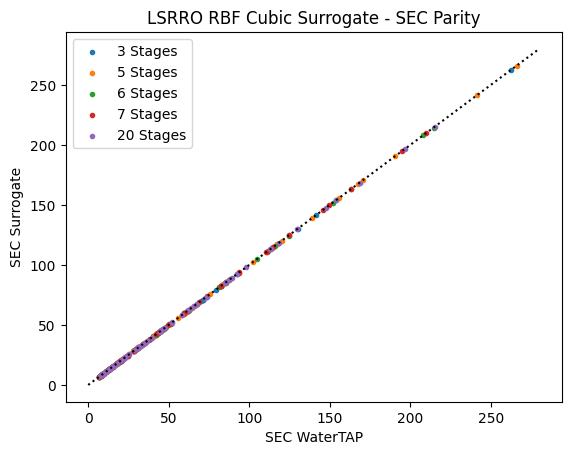

In [73]:
import pprint
from pyomo.environ import ConcreteModel, Var, assert_optimal_termination

from idaes.core.surrogate.surrogate_block import SurrogateBlock
from idaes.core.surrogate.pysmo_surrogate import PysmoSurrogate

import idaes.core.surrogate.pysmo_surrogate as surrogate
from idaes.core.surrogate.metrics import compute_fit_metrics
from watertap.core.solvers import get_solver

solver = get_solver()

# -------------------------------------------------------------------
rbf_trainer = surrogate.PysmoRBFTrainer(
    input_labels=["# Feed Concentration", "Volumetric Recovery Rate", "number_stages"],
    output_labels=["LCOW", "SEC"],
    training_dataframe=data,
)
rbf_trainer.config.basis_function = "linear"
rbf_train = rbf_trainer.train_surrogate()

input_labels = rbf_trainer._input_labels
output_labels = rbf_trainer._output_labels

xmin, xmax = [70, 0.2, 3], [225, 0.65, 20]
input_bounds = {input_labels[i]: (xmin[i], xmax[i]) for i in range(len(input_labels))}
input_bounds

LSRRO_surrogate = surrogate.PysmoSurrogate(
    rbf_train, input_labels, output_labels, input_bounds
)

LSRRO_surrogate.save_to_file(
    "LSRRO_surrogate_rbf_linear.json",
    overwrite=True,
)

m = ConcreteModel()
m.number_stages = Var()
m.feed_salinity = Var()
m.recovery = Var()
m.LCOW = Var()
m.SEC = Var()
LSRRO_surrogate = PysmoSurrogate.load_from_file("LSRRO_surrogate_rbf_linear.json")
m.LSRRO_surrogate = SurrogateBlock(concrete=True)
m.LSRRO_surrogate.build_model(
    LSRRO_surrogate,
    input_vars=[m.feed_salinity, m.recovery, m.number_stages],
    output_vars=[m.LCOW, m.SEC],
)

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
for n in [3, 5, 6, 7, 20]:
    data_n = data[data.number_stages == n].copy()
    lcow_pred = list()
    sec_pred = list()
    for i, row in data_n.iterrows():
        # print(row)
        m.number_stages.fix(n)
        m.feed_salinity.fix(row["# Feed Concentration"])
        m.recovery.fix(row["Volumetric Recovery Rate"])
        results = solver.solve(m)
        assert_optimal_termination(results)
        lcow_pred.append(m.LCOW())
        sec_pred.append(m.SEC())

    ax.scatter(data_n["LCOW"], lcow_pred, marker=".", label=f"{n} Stages")
    ax2.scatter(data_n["SEC"], sec_pred, marker=".", label=f"{n} Stages")
ax.set(xlabel="LCOW WaterTAP", ylabel="LCOW Surrogate", title="LSRRO RBF Linear Surrogate - LCOW Parity")
ax.plot([0, 70], [0, 70], ls=":", color="k")
ax2.set(xlabel="SEC WaterTAP", ylabel="SEC Surrogate", title="LSRRO RBF Linear Surrogate - SEC Parity")
ax2.plot([0, 280], [0, 280], ls=":", color="k")
ax.legend()
ax2.legend()
fit_metrics = compute_fit_metrics(LSRRO_surrogate, data)
pprint.pprint(fit_metrics)

# -------------------------------------------------------------------
rbf_trainer = surrogate.PysmoRBFTrainer(
    input_labels=["# Feed Concentration", "Volumetric Recovery Rate", "number_stages"],
    output_labels=["LCOW", "SEC"],
    training_dataframe=data,
)
rbf_trainer.config.basis_function = "cubic"
rbf_train = rbf_trainer.train_surrogate()

input_labels = rbf_trainer._input_labels
output_labels = rbf_trainer._output_labels

xmin, xmax = [70, 0.2, 3], [225, 0.65, 20]
input_bounds = {input_labels[i]: (xmin[i], xmax[i]) for i in range(len(input_labels))}
input_bounds

LSRRO_surrogate = surrogate.PysmoSurrogate(
    rbf_train, input_labels, output_labels, input_bounds
)

LSRRO_surrogate.save_to_file(
    "LSRRO_surrogate_rbf_cubic.json",
    overwrite=True,
)

m = ConcreteModel()
m.number_stages = Var()
m.feed_salinity = Var()
m.recovery = Var()
m.LCOW = Var()
m.SEC = Var()
LSRRO_surrogate = PysmoSurrogate.load_from_file("LSRRO_surrogate_rbf_cubic.json")
m.LSRRO_surrogate = SurrogateBlock(concrete=True)
m.LSRRO_surrogate.build_model(
    LSRRO_surrogate,
    input_vars=[m.feed_salinity, m.recovery, m.number_stages],
    output_vars=[m.LCOW, m.SEC],
)
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
for n in [3, 5, 6, 7, 20]:
    data_n = data[data.number_stages == n].copy()
    lcow_pred = list()
    sec_pred = list()
    for i, row in data_n.iterrows():
        # print(row)
        m.number_stages.fix(n)
        m.feed_salinity.fix(row["# Feed Concentration"])
        m.recovery.fix(row["Volumetric Recovery Rate"])
        results = solver.solve(m)
        assert_optimal_termination(results)
        lcow_pred.append(m.LCOW())
        sec_pred.append(m.SEC())

    ax.scatter(data_n["LCOW"], lcow_pred, marker=".", label=f"{n} Stages")
    ax2.scatter(data_n["SEC"], sec_pred, marker=".", label=f"{n} Stages")
ax.set(xlabel="LCOW WaterTAP", ylabel="LCOW Surrogate", title="LSRRO RBF Cubic Surrogate - LCOW Parity")
ax.plot([0, 70], [0, 70], ls=":", color="k")
ax2.set(xlabel="SEC WaterTAP", ylabel="SEC Surrogate", title="LSRRO RBF Cubic Surrogate - SEC Parity")
ax2.plot([0, 280], [0, 280], ls=":", color="k")
ax.legend()
ax2.legend()
fit_metrics = compute_fit_metrics(LSRRO_surrogate, data)
pprint.pprint(fit_metrics)

In [74]:
m.display()

Model unknown

  Variables:
    number_stages : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     3 :    20 :    20 :  True :  True :  Reals
    feed_salinity : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :    70 : 225.0 :   225 :  True :  True :  Reals
    recovery : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   0.2 :  0.25 :  0.65 :  True :  True :  Reals
    LCOW : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 48.44819965677721 :  None : False : False :  Reals
    SEC : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : 196.43154701646958 :  None : False : False :  Reals

  Objectives:
    None

  Constraints:
    None

  Blocks:
    Block LSRRO_surrogate
    
      Variables:
        None
    
     

In [ ]:
# from watertap.flowsheets.lsrro.multi_sweep import (
#     _lsrro_presweep as setup_sensitivity_sweep,
# )
# from parameter_sweep import LinearSample, parameter_sweep

# number_of_stages = 5
# output_filename = f"param_sweep_output/{number_of_stages}_stage/results_LSRRO.csv"
# sweep_params = {}
# outputs = {}
# nx = 10

# m = setup_sensitivity_sweep(number_of_stages=number_of_stages)
# m.fs.feed.flow_mass_phase_comp.unfix()
# m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"].fix()
# m.fs.feed.properties[0].flow_vol_phase["Liq"].fix()
# # Sweep parameters ------------------------------------------------------------------------

# sweep_params["Feed Concentration"] = LinearSample(
#     m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"], 70, 150, nx
# )

# sweep_params["Volumetric Recovery Rate"] = LinearSample(
#     m.fs.water_recovery, 0.2, 0.65, nx
# )

# # Outputs  -------------------------------------------------------------------------------
# outputs["LCOW"] = m.fs.costing.LCOW
# outputs["LCOW wrt Feed Flow"] = m.fs.costing.LCOW_feed
# outputs["SEC"] = m.fs.costing.specific_energy_consumption
# outputs["SEC wrt Feed"] = m.fs.costing.specific_energy_consumption_feed

# sweep_sensitivity_results = parameter_sweep(
#     m,
#     sweep_params,
#     outputs,
#     csv_results_file_name=output_filename,
#     optimize_function=lsrro.solve,
#     interpolate_nan_outputs=True,
# )

Feed Concentration = 70.0 g/L
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-03 22:55:57 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-03 22:55:57 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-03 22:55:57 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-03 22:55:57 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-03 22:55:57 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-03 22:55:58 [INFO] idaes.init.fs.ROUnits[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-03 22:55:58 [INFO] idaes.init.fs.EnergyRecoveryDevices[1].control

In [22]:
from pyomo.environ import units as pyunits

Qin = pyunits.convert(
    1 * pyunits.Mgallons / pyunits.day, to_units=pyunits.m**3 / pyunits.s
)()
A_value = pyunits.convert(
    1.5 * pyunits.liter / pyunits.m**2 / pyunits.hr / pyunits.bar,
    to_units=pyunits.m / pyunits.s / pyunits.Pa,
)()
from watertap.flowsheets.lsrro.lsrro import (
    ACase,
    BCase,
    ABTradeoff,
    run_lsrro_case,
)
import logging

logging.getLogger("idaes").setLevel(logging.ERROR)
logging.getLogger("pyomo").setLevel(logging.ERROR)
m = run_lsrro_case(
    5,
    # water_recovery=None,
    Cin=70,
    Qin=Qin,
    Cbrine=250,
    A_case=ACase.optimize,
    B_case=BCase.optimize,
    AB_tradeoff=ABTradeoff.equality_constraint,
    # A_value=A_value,
    has_NaCl_solubility_limit=True,
    has_calculated_concentration_polarization=True,
    has_calculated_ro_pressure_drop=True,
    permeate_quality_limit=1000e-6,
    AB_gamma_factor=None,
    B_max=None,
    number_of_RO_finite_elements=10,
    set_default_bounds_on_module_dimensions=True,
    # skip_initialization=True,
)

Feed Concentration = 70.0 ppt
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-03 15:07:08 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-03 15:07:08 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-03 15:07:08 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-03 15:07:08 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-03 15:07:08 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-03 15:07:09 [INFO] idaes.in

In [24]:
# Import LSRRO flowsheet module
from watertap.flowsheets.lsrro import lsrro

# m[].fs.ROUnits[m.fs.Stages.last()].feed_side.properties[
#     0, 1
# ].conc_mass_phase_comp.display()
m = m[0]
m.fs.ROUnits[m.fs.Stages.last()].feed_side.properties[
    0, 1
].conc_mass_phase_comp.display()
# m.fs.costing.LCOW.display()
# lsrro.display_system(m)
m.fs.disposal.display()

conc_mass_phase_comp : Mass concentration
    Size=2, Index=fs.properties.phase_list*fs.properties.component_list, Units=kg/m**3
    Key             : Lower : Value             : Upper  : Fixed : Stale : Domain
     ('Liq', 'H2O') : 0.001 : 908.1861963141049 : 2000.0 : False : False :  Reals
    ('Liq', 'NaCl') : 0.001 :               250 : 2000.0 :  True :  True :  Reals
Block fs.disposal

  Variables:
    flow_mass_phase_comp : Size=2, Index=fs._time*fs.properties.phase_list*fs.properties.component_list, ReferenceTo=fs.disposal.properties[:].component('flow_mass_phase_comp')[...]
        Key                  : Lower : Value              : Upper : Fixed : Stale : Domain
         (0.0, 'Liq', 'H2O') :   0.0 : 11.025870700772359 :  None : False : False : NonNegativeReals
        (0.0, 'Liq', 'NaCl') :   0.0 : 3.0351349606284246 :  None : False : False : NonNegativeReals
    temperature : Size=1, Index=fs._time, ReferenceTo=fs.disposal.properties[:].component('temperature')
        Key :

# UI Demonstration

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from watertap.flowsheets.crystallization.demo_utils import plot_contour

# res = sweep_sensitivity_results[0]
# sr = sweep_sensitivity_results[1]
# # res
# x = sr["sweep_params"]["Feed Concentration"]["value"]
# y = sr["sweep_params"]["Volumetric Recovery Rate"]["value"]
# z = sr["outputs"]["LCOW"]

# sr["outputs"]
# res
# x
# fig, ax = plt.subplots()
# ax.contourf(x, y, z, levels=100, cmap="viridis")
f = "/Users/ksitterl/Documents/Python/watertap/watertap/tutorials/param_sweep_output/5_stage/results_LSRRO.csv"
df = pd.read_csv(f)
fig, ax = plot_contour(
    df, y="# Feed Concentration", x="Volumetric Recovery Rate", z="LCOW", cmap="viridis"
)